<a href="https://colab.research.google.com/github/ra2309/AIWorkshop/blob/main/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This section is related to reading and mounting data from Google Drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.chdir('drive/MyDrive/Welllogs')

The first step after mounting data is to ignest them. In most industries, it is suffcieient to read only csv, excel and other formats. In oil/gas industry, there are, however, many file formats not readable naturally by pandas or numpy. Thus, we utilize 3rd party libraries like lasio to read las files. We start by installing lasio.

In [2]:
!pip install lasio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.1 MB/s eta 0:00:00


For the purpose of testing mounting and ingestion, we read one sample file.

In [12]:
import lasio
las=lasio.read('1052987184.las')

lasio library enables to transform data into a pandas dataframe.

In [13]:
df = las.df()

In [14]:
df.head()

,ABHV,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,TBHV,MEL15,MEL20,MELCAL
DEPT,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,22.9799,NaN,NaN,100000.0,1.0667,2062.7507,151.6998,-91.4477,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,24.3601,NaN,NaN,100000.0,4.0241,3293.4761,133.4111,-66.0708,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,26.1486,NaN,NaN,100000.0,100000.0000,3339.4282,132.8695,-55.1717,NaN,NaN,NaN,NaN
1.5,NaN,NaN,NaN,NaN,28.5913,NaN,NaN,100000.0,100000.0000,3339.6782,132.8666,-50.0492,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,31.5497,NaN,NaN,100000.0,100000.0000,3339.6782,132.8666,-47.8064,NaN,NaN,NaN,NaN


Now, we go ahead and read whole set of data. We create an empty list of dataframes where we will append single dataframe read from las.

In [17]:
dfs = []
for file in os.listdir():
  print(file)
  las = lasio.read(file)
  df = las.df()
  dfs.append(df)

1053243844.las
1052987184.las
1053318726.las
1053292672.las


KeyError: ignored

We discovered an error which is a natural situation in automation and machine learning workflow. I printed list of files and shown the file that is troublesome. Now, if we open it with a text editor we will clearly see the error reason. We try one more time this time with try and except. In addition, to identify different wells from each other in this dataframe, we record name of the well.

In [21]:
dfs = []
for file in os.listdir():
  try:
    las = lasio.read(file)
    df = las.df()
    df['WELL'] = file.split('.las')[0]
    dfs.append(df)
  except Exception as e:
    print(file)
    print(e)

1053292672.las
'No ~ sections found. Is this a LAS file?'


Now, we convert list of dfs into a one single dataframe with a command called concat.

In [22]:
import pandas as pd
big_df = pd.concat(dfs)

In [23]:
big_df.head()

,CNPOR,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,...,DPHL,PEF,NPHL,PXND,MINV,MNOR,DPHS,NPHS,DPHD,NPHD
DEPT,,,,,,,,,,,,,,,,,,,,,
2.5,NaN,NaN,29.4789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,29.5145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.5,NaN,NaN,28.8759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,28.5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.5,NaN,NaN,29.2807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We check number of columns that are there.

In [24]:
big_df.columns

Index(['CNPOR', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM', 'RLL3', 'RXORT',
       'SP', 'MEL15', 'MEL20', 'WELL', 'ABHV', 'DCAL', 'TBHV', 'MELCAL', 'PE',
       'AVTX', 'BVTX', 'MINMK', 'CILD', 'CNDL', 'CNLS', 'CNSS', 'LSPD', 'LTEN',
       'MCAL', 'MI', 'MN', 'DT', 'ITT', 'SPOR', 'DEVI', 'DTMP', 'NPOR', 'GK1',
       'IA10_2', 'IA20_2', 'IA30_2', 'IA60_2', 'IA90_2', 'CIA90_2', 'RXO_2',
       'RT_2', 'CALI', 'DRHO', 'DPHL', 'PEF', 'NPHL', 'PXND', 'MINV', 'MNOR',
       'DPHS', 'NPHS', 'DPHD', 'NPHD'],
      dtype='object')

We run count to check number of missing values there. In addition, we compare that to shape of array.

In [26]:
big_df.shape

(693010, 57)

In [25]:
big_df.count()

CNPOR      382507
DPOR       430143
GR         573870
RHOB       388833
RHOC       429901
RILD       681552
RILM       681713
RLL3       680997
RXORT      301043
SP         690601
MEL15      114231
MEL20      114225
WELL       693010
ABHV       137493
DCAL       438320
TBHV        84687
MELCAL     151083
PE         112169
AVTX       338593
BVTX       338593
MINMK       86552
CILD       221297
CNDL       219252
CNLS       219252
CNSS       219252
LSPD       221296
LTEN       213403
MCAL       215853
MI         221926
MN         221926
DT         262227
ITT        262237
SPOR       262227
DEVI        71467
DTMP        65039
NPOR        45242
GK1        111916
IA10_2       9391
IA20_2       9391
IA30_2       9391
IA60_2       9391
IA90_2       9391
CIA90_2      9391
RXO_2        9391
RT_2         9391
CALI         4484
DRHO         4478
DPHL         4478
PEF          4473
NPHL         4458
PXND         4458
MINV         4438
MNOR         4438
DPHS         4478
NPHS         4458
DPHD      

In [31]:
(big_df.count()/big_df.shape[0])>.6b

CNPOR      False
DPOR        True
GR          True
RHOB       False
RHOC        True
RILD        True
RILM        True
RLL3        True
RXORT      False
SP          True
MEL15      False
MEL20      False
WELL        True
ABHV       False
DCAL        True
TBHV       False
MELCAL     False
PE         False
AVTX       False
BVTX       False
MINMK      False
CILD       False
CNDL       False
CNLS       False
CNSS       False
LSPD       False
LTEN       False
MCAL       False
MI         False
MN         False
DT         False
ITT        False
SPOR       False
DEVI       False
DTMP       False
NPOR       False
GK1        False
IA10_2     False
IA20_2     False
IA30_2     False
IA60_2     False
IA90_2     False
CIA90_2    False
RXO_2      False
RT_2       False
CALI       False
DRHO       False
DPHL       False
PEF        False
NPHL       False
PXND       False
MINV       False
MNOR       False
DPHS       False
NPHS       False
DPHD       False
NPHD       False
dtype: bool

We select columns that are mostly filled.

In [33]:
cols_to_delete = big_df.columns[big_df.isnull().sum()/len(big_dfb) > .60]

In [35]:
big_df.drop(cols_to_delete, axis = 1, inplace = True)

<ipython-input-41-a70a98e82693>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = big_df.corr()


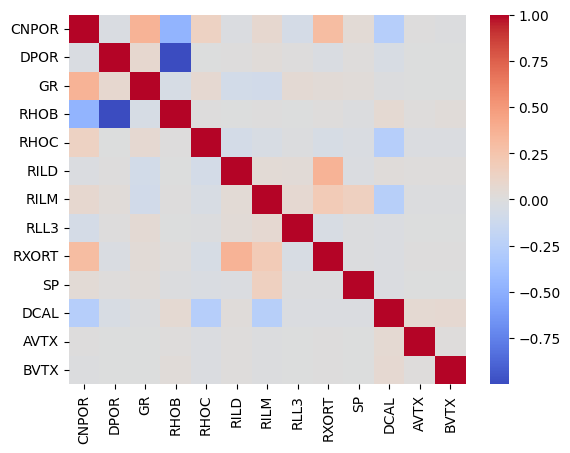

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = big_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [46]:
lst = big_df.columns.tolist()
lst.remove('WELL')

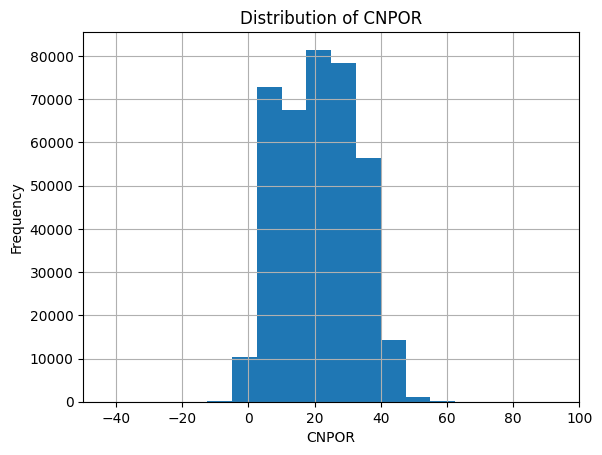

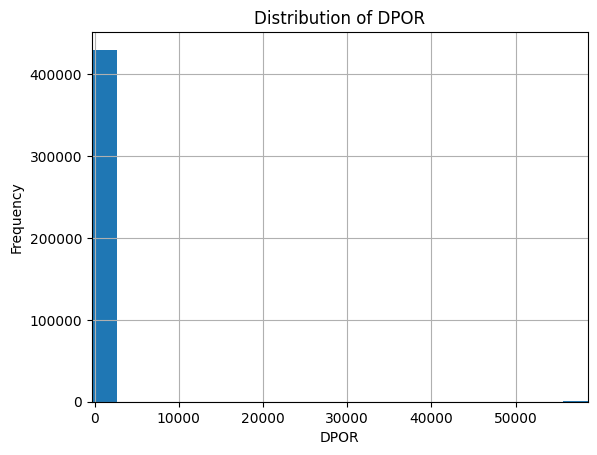

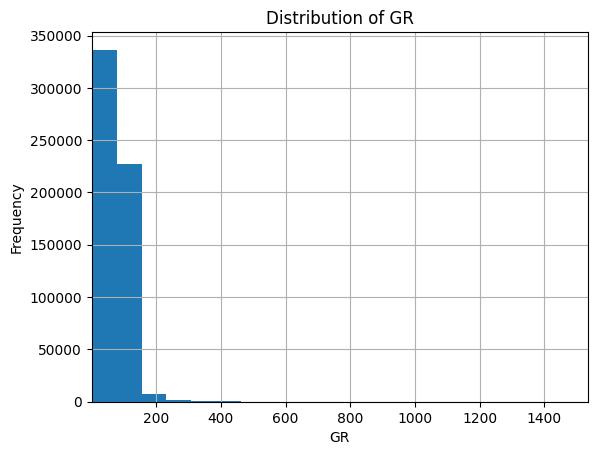

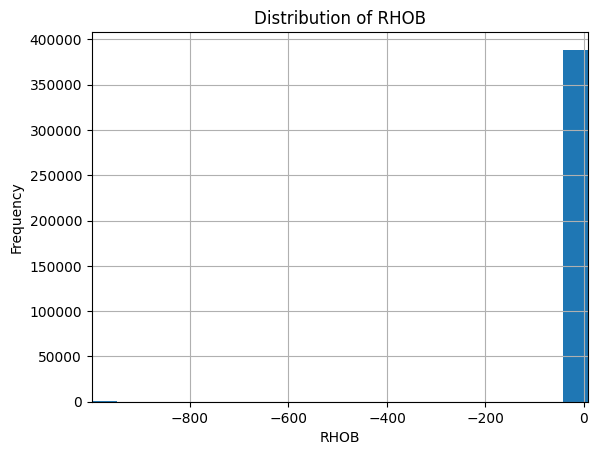

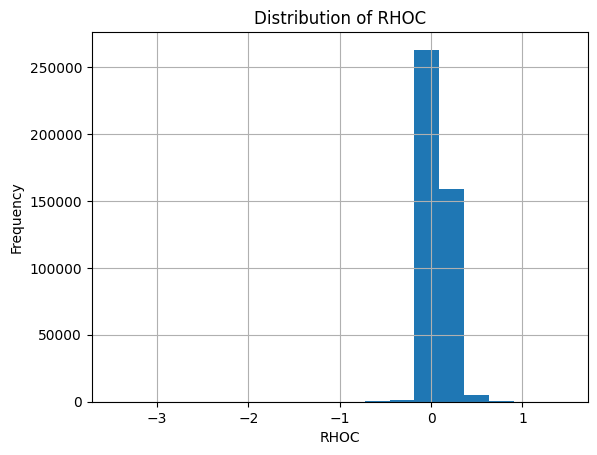

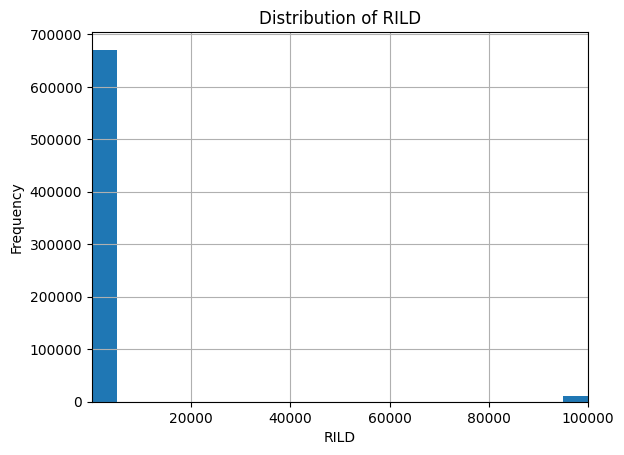

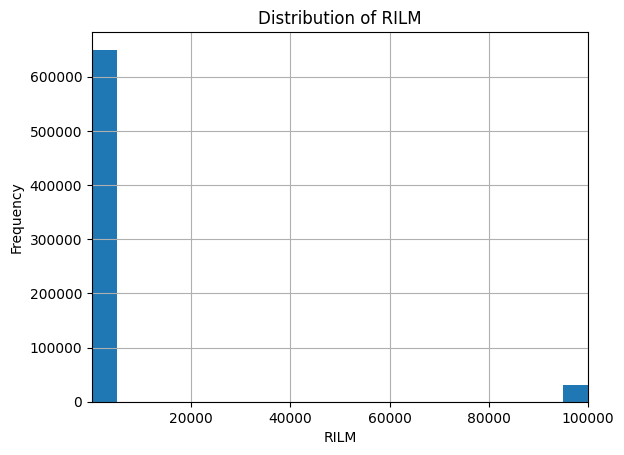

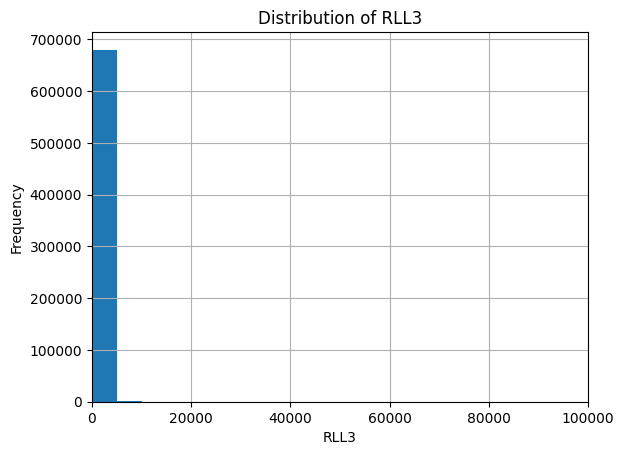

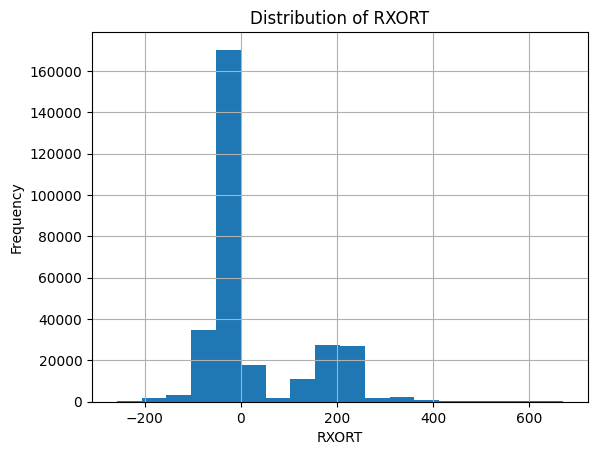

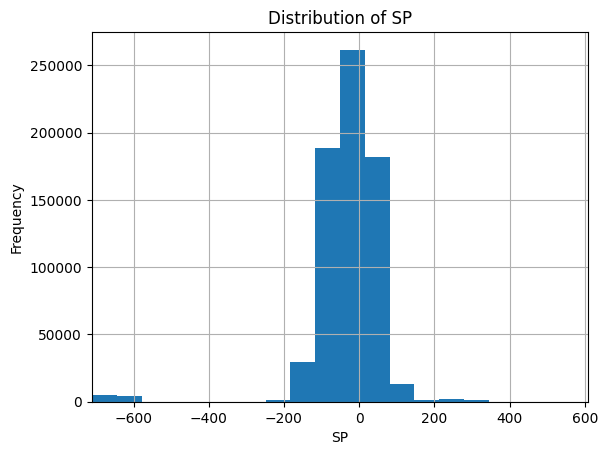

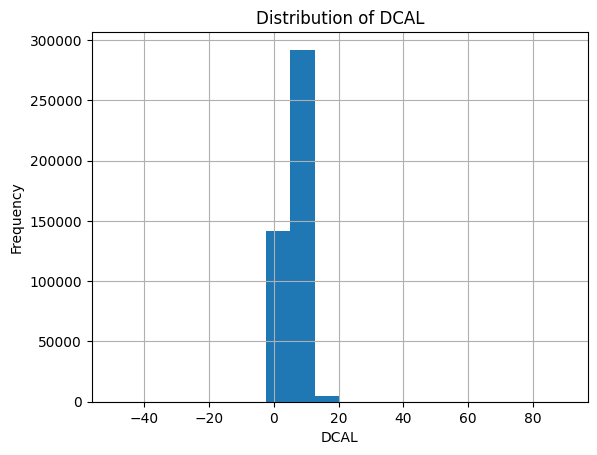

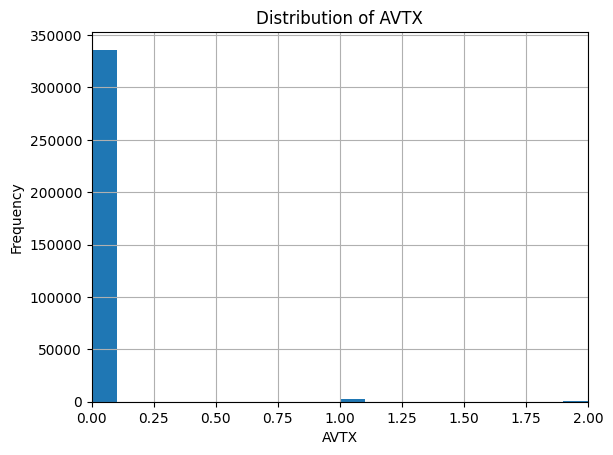

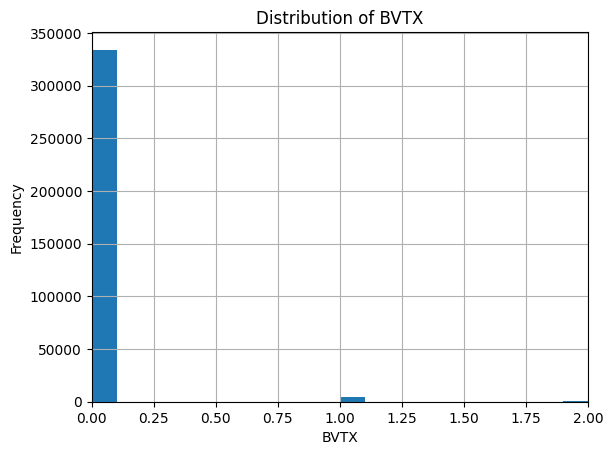

In [47]:
# draw a histogram of the age column with 20 bins
for c in lst:
  big_df[c].hist(bins=20)

# add labels and title
  plt.xlabel(c)
  plt.ylabel('Frequency')
  plt.title('Distribution of '+c)
  plt.xlim(big_df[c].min(),big_df[c].max())
  plt.show()

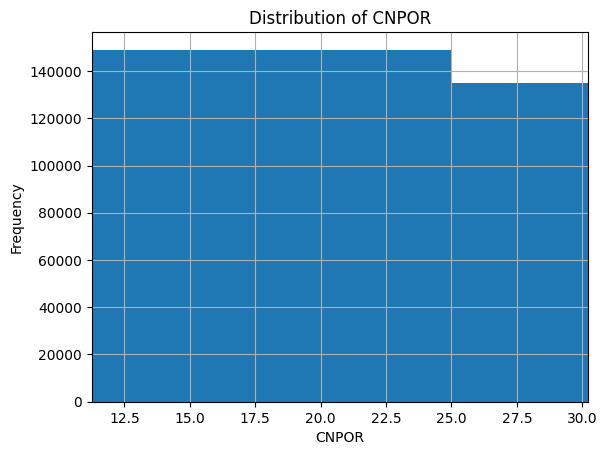

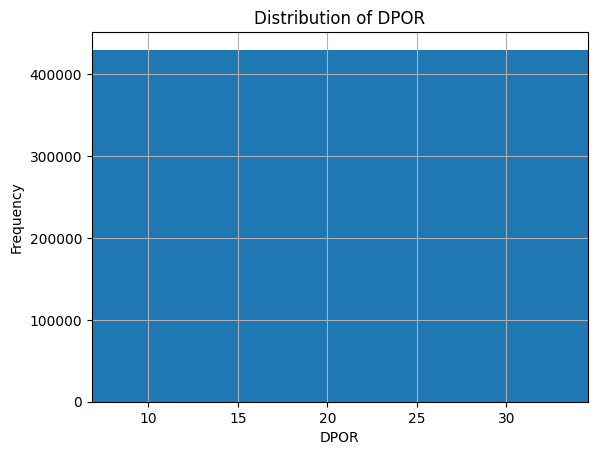

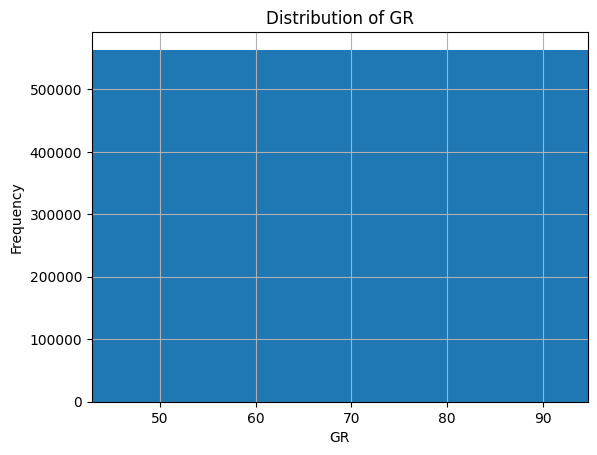

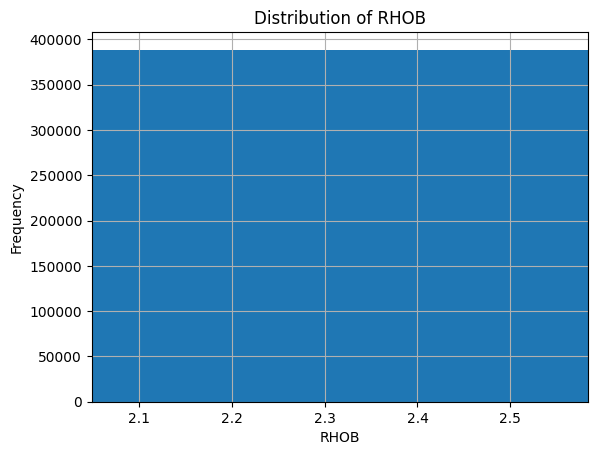

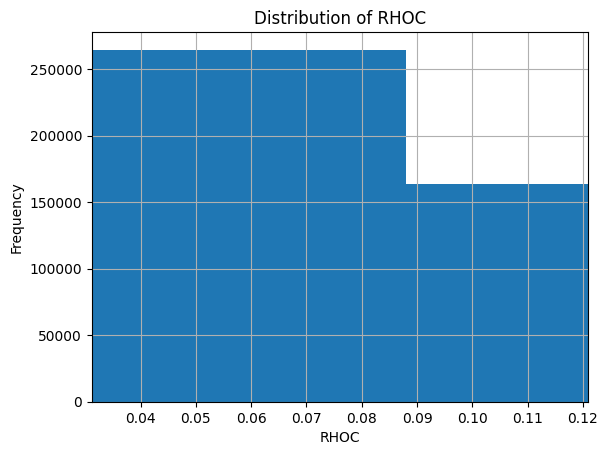

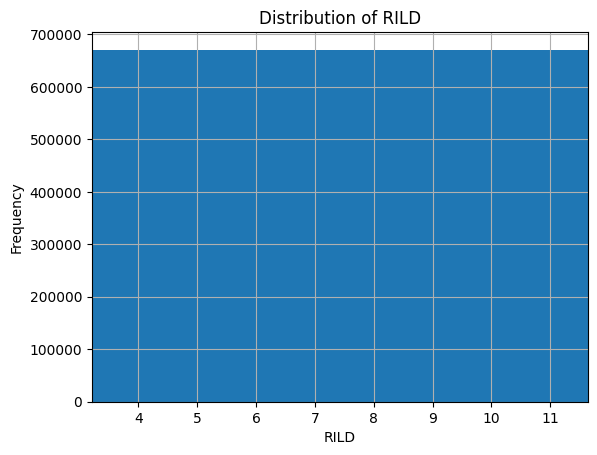

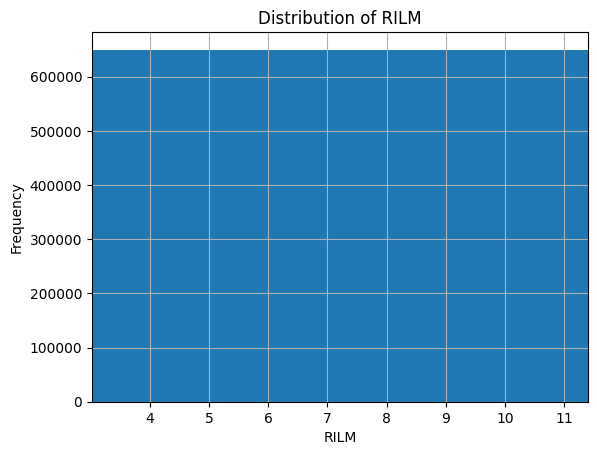

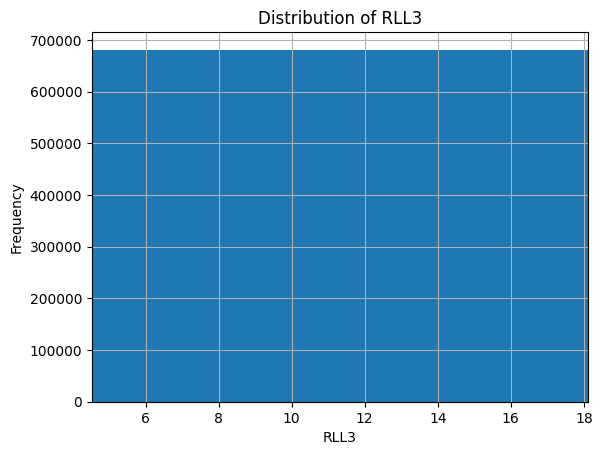

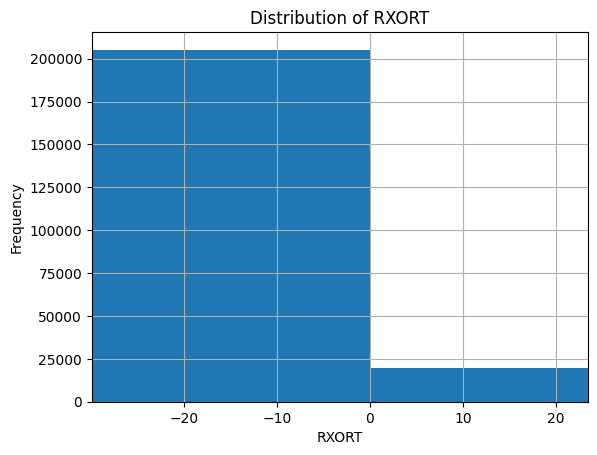

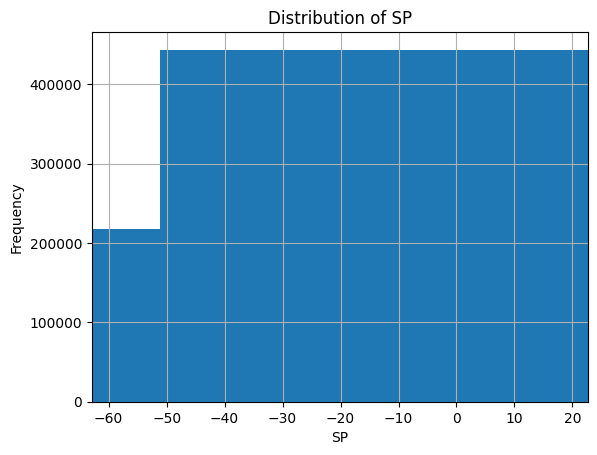

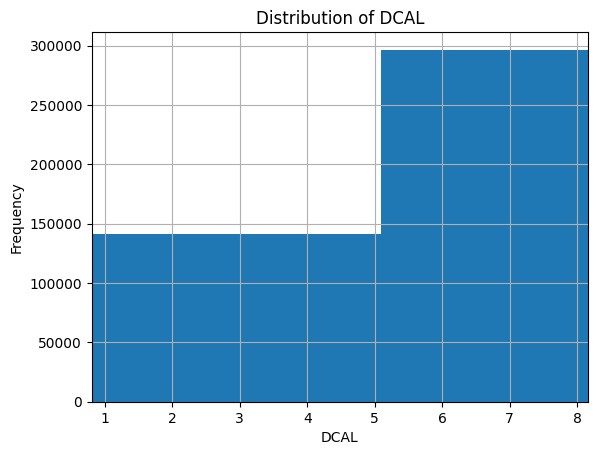

<ipython-input-57-2fa7519d26e3>:9: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(big_df[c].quantile(.25),big_df[c].quantile(.75))


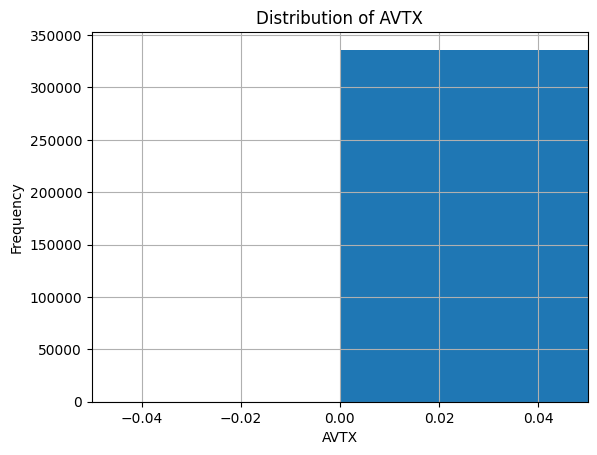

<ipython-input-57-2fa7519d26e3>:9: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(big_df[c].quantile(.25),big_df[c].quantile(.75))


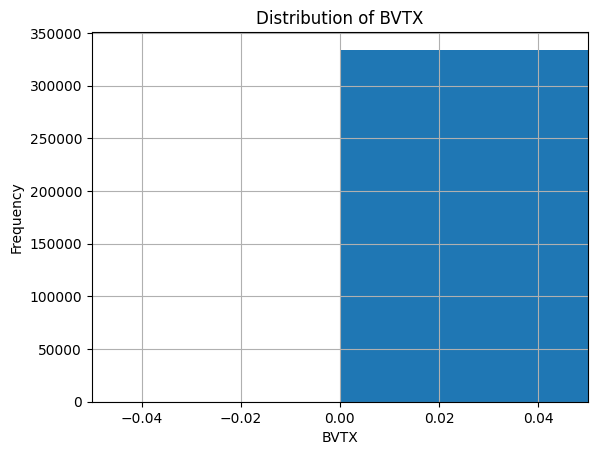

In [57]:
# draw a histogram of the age column with 20 bins
for c in lst:
  big_df[c].hist(bins=10)

# add labels and title
  plt.xlabel(c)
  plt.ylabel('Frequency')
  plt.title('Distribution of '+c)
  plt.xlim(big_df[c].quantile(.25),big_df[c].quantile(.75))
  plt.show()